In [1]:
import sys
import os
sys.path.append(os.path.abspath("/data2/eranario/scratch/rgb-to-multispectral-unet"))

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

from src.dataset import PotatoDataset
from src.model import Generator, Discriminator
# from src.util import show_predictions
from torch.utils.data import DataLoader
from tqdm import tqdm

In [3]:
# set torch random seed
torch.manual_seed(42)

# Dataset

In [4]:
rgb_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/RGB_Images"
spectral_dir = "/data2/eranario/data/Multispectral-Potato/Dataset/Spectral_Images"

In [5]:
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [6]:
train_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='train')
val_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='val')
test_dataset = PotatoDataset(rgb_dir, spectral_dir, transform=transform, mode='test')

# print the size of the datasets
print(f"Train dataset size: {len(train_dataset)}")
print(f"Validation dataset size: {len(val_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Loading test data: 100%|██████████| 60/60 [00:00<00:00, 325.83it/s]


Train dataset size: 240
Validation dataset size: 60
Test dataset size: 60


In [7]:
batch_size = 32
num_workers = 4

train_dataloader = DataLoader(
    train_dataset, 
    batch_size=batch_size, 
    shuffle=True,
    num_workers=num_workers
)

val_dataloader = DataLoader(
    val_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=num_workers
)

test_dataloader = DataLoader(
    test_dataset, 
    batch_size=batch_size, 
    shuffle=False,
    num_workers=num_workers
)

# Model

In [8]:
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# generator
noise_dim=100
netG = Generator(noise_dim=noise_dim, out_channels=len(train_dataset.channels)).to(device)
netG.apply(weights_init)

# discriminator
netD = Discriminator(in_channels=len(train_dataset.channels)).to(device)
netD.apply(weights_init)

# loss
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Training

Epoch [1/50] - Train Loss: 2.7105, Val Loss: 0.6972, SSIM: 0.0620


Epoch [2/50] - Train Loss: 3.5395, Val Loss: 0.8398, SSIM: 0.0429


Epoch [3/50] - Train Loss: 4.6237, Val Loss: 1.9525, SSIM: 0.0420


Epoch [4/50] - Train Loss: 6.8026, Val Loss: 6.9495, SSIM: 0.0322


Epoch [5/50] - Train Loss: 2.6454, Val Loss: 1.3225, SSIM: 0.0346


Epoch [6/50] - Train Loss: 2.8846, Val Loss: 2.3277, SSIM: 0.0475


Epoch [7/50] - Train Loss: 3.8086, Val Loss: 1.1451, SSIM: 0.0652


Epoch [8/50] - Train Loss: 4.0186, Val Loss: 0.7847, SSIM: 0.0690


Epoch [9/50] - Train Loss: 2.6005, Val Loss: 0.3800, SSIM: 0.0809


Epoch [10/50] - Train Loss: 3.4809, Val Loss: 0.8303, SSIM: 0.0921


Epoch [11/50] - Train Loss: 3.7026, Val Loss: 0.2664, SSIM: 0.0753


Epoch [12/50] - Train Loss: 3.6646, Val Loss: 0.4668, SSIM: 0.0676


Epoch [13/50] - Train Loss: 4.6364, Val Loss: 0.2728, SSIM: 0.0583


Epoch [14/50] - Train Loss: 3.3932, Val Loss: 1.4705, SSIM: 0.0606


Epoch [15/50] - Train Loss: 4.2179, Val Loss: 5.1513, SSIM: 0.0689


Epoch [16/50] - Train Loss: 3.7037, Val Loss: 0.5850, SSIM: 0.0712


Epoch [17/50] - Train Loss: 2.4851, Val Loss: 1.0453, SSIM: 0.0650


Epoch [18/50] - Train Loss: 2.9428, Val Loss: 0.4704, SSIM: 0.0636


Epoch [19/50] - Train Loss: 2.4350, Val Loss: 1.4767, SSIM: 0.0674


Epoch [20/50] - Train Loss: 2.2948, Val Loss: 1.5375, SSIM: 0.0755


Epoch [21/50] - Train Loss: 2.8986, Val Loss: 0.6218, SSIM: 0.0759


Epoch [22/50] - Train Loss: 2.6673, Val Loss: 0.8235, SSIM: 0.0784


Epoch [23/50] - Train Loss: 2.6328, Val Loss: 0.9052, SSIM: 0.0841


Epoch [24/50] - Train Loss: 2.2263, Val Loss: 0.8256, SSIM: 0.0805


Epoch [25/50] - Train Loss: 2.8702, Val Loss: 0.5557, SSIM: 0.0792


Epoch [26/50] - Train Loss: 2.6051, Val Loss: 0.6646, SSIM: 0.0794


Epoch [27/50] - Train Loss: 3.6642, Val Loss: 0.8591, SSIM: 0.0740


Epoch [28/50] - Train Loss: 2.7753, Val Loss: 1.5523, SSIM: 0.0686


Epoch [29/50] - Train Loss: 2.7540, Val Loss: 0.6572, SSIM: 0.0767


Epoch [30/50] - Train Loss: 3.2192, Val Loss: 0.7770, SSIM: 0.0748


Epoch [31/50] - Train Loss: 2.6744, Val Loss: 0.7452, SSIM: 0.0791


Epoch [32/50] - Train Loss: 2.4543, Val Loss: 0.5013, SSIM: 0.0754


Epoch [33/50] - Train Loss: 3.0960, Val Loss: 0.6321, SSIM: 0.0796


Epoch [34/50] - Train Loss: 2.2526, Val Loss: 0.7512, SSIM: 0.0794


Epoch [35/50] - Train Loss: 2.2454, Val Loss: 0.7574, SSIM: 0.0748


Epoch [36/50] - Train Loss: 2.0737, Val Loss: 0.9157, SSIM: 0.0741


Epoch [37/50] - Train Loss: 2.0841, Val Loss: 3.0441, SSIM: 0.0802


Epoch [38/50] - Train Loss: 2.9022, Val Loss: 0.7943, SSIM: 0.0787


Epoch [39/50] - Train Loss: 2.0094, Val Loss: 0.8559, SSIM: 0.0771


Epoch [40/50] - Train Loss: 2.0777, Val Loss: 0.9125, SSIM: 0.0779


Epoch [41/50] - Train Loss: 2.2294, Val Loss: 0.9165, SSIM: 0.0726


Epoch [42/50] - Train Loss: 2.1381, Val Loss: 1.2056, SSIM: 0.0735


Epoch [43/50] - Train Loss: 2.2177, Val Loss: 0.9066, SSIM: 0.0738


Epoch [44/50] - Train Loss: 2.2980, Val Loss: 1.1525, SSIM: 0.0752


Epoch [45/50] - Train Loss: 2.2432, Val Loss: 1.0132, SSIM: 0.0768


Epoch [46/50] - Train Loss: 2.3794, Val Loss: 1.2563, SSIM: 0.0744


Epoch [47/50] - Train Loss: 2.3539, Val Loss: 1.0441, SSIM: 0.0735


Epoch [48/50] - Train Loss: 2.4910, Val Loss: 1.5456, SSIM: 0.0762


Epoch [49/50] - Train Loss: 2.5672, Val Loss: 1.1509, SSIM: 0.0727


Epoch [50/50] - Train Loss: 2.4368, Val Loss: 0.8478, SSIM: 0.0784


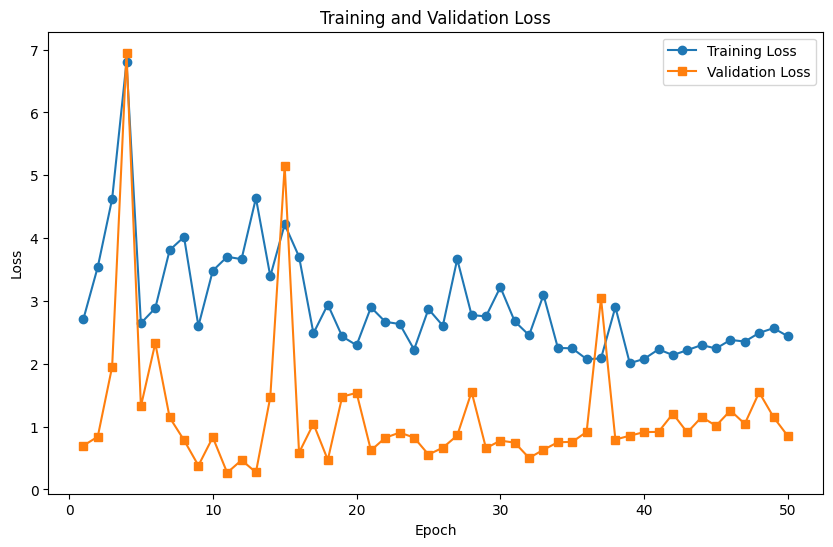

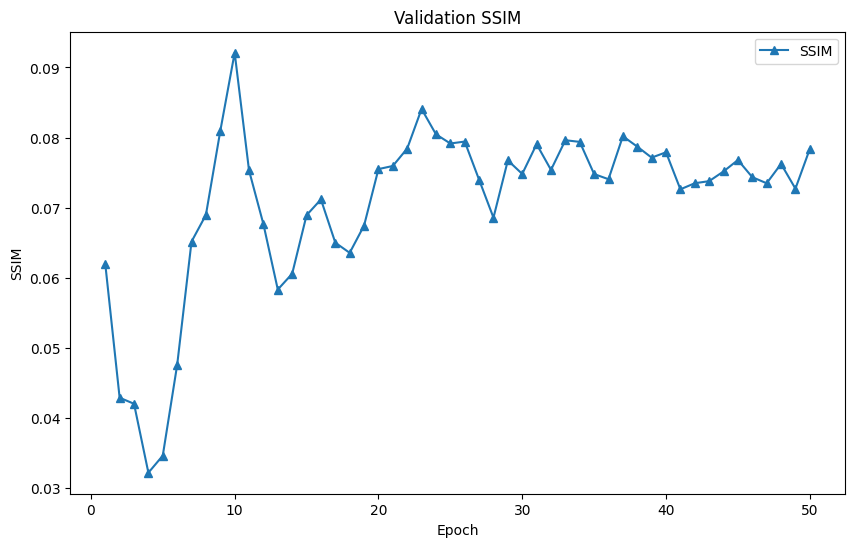

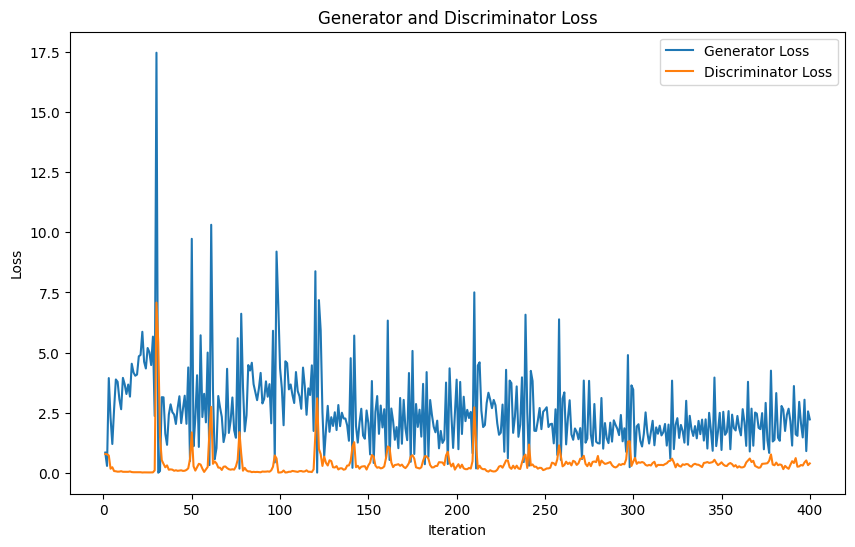

In [10]:
from skimage.metrics import structural_similarity as ssim
import numpy as np

num_epochs = 50
train_losses = []
val_losses = []
G_losses = []
D_losses = []
similarities = []  # To store SSIM scores for each epoch

for epoch in range(num_epochs):
    netG.train()
    netD.train()
    train_loss = 0.0

    train_loop = tqdm(train_dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Training", leave=False)

    for i, batch in enumerate(train_loop):
        rgb_images, *spectral_images = batch
        rgb_images = rgb_images.to(device)
        spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)

        # Adversarial ground truths
        valid = torch.ones(rgb_images.size(0), 1, device=device, requires_grad=False)
        fake = torch.zeros(rgb_images.size(0), 1, device=device, requires_grad=False)

        ### --------------------
        ### Train Generator
        ### --------------------
        optimizerG.zero_grad()

        # Sample noise as generator input
        noise = torch.randn(rgb_images.size(0), noise_dim, device=device)

        # Generate fake images
        gen_images = netG(noise)

        # Generator loss
        g_loss = criterion(netD(gen_images), valid)

        g_loss.backward()
        optimizerG.step()

        ### ---------------------
        ### Train Discriminator
        ### ---------------------
        optimizerD.zero_grad()

        # Real loss
        real_loss = criterion(netD(spectral_images), valid)

        # Fake loss
        fake_loss = criterion(netD(gen_images.detach()), fake)

        # Total Discriminator loss
        d_loss = (real_loss + fake_loss) / 2

        d_loss.backward()
        optimizerD.step()

        # Log losses
        D_losses.append(d_loss.item())
        G_losses.append(g_loss.item())

        train_loss += (d_loss.item() + g_loss.item())
        train_loop.set_postfix(D_loss=d_loss.item(), G_loss=g_loss.item())

    avg_train_loss = train_loss / len(train_dataloader)
    train_losses.append(avg_train_loss)

    ### ---------------------
    ### Validation Phase
    ### ---------------------
    netG.eval()
    netD.eval()
    val_loss = 0.0
    similarity_score = 0.0

    val_loop = tqdm(val_dataloader, desc=f"Epoch [{epoch+1}/{num_epochs}] - Validation", leave=False)

    with torch.no_grad():
        for batch in val_loop:
            rgb_images, *spectral_images = batch
            rgb_images = rgb_images.to(device)
            spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)

            noise = torch.randn(rgb_images.size(0), noise_dim, device=device)
            gen_images = netG(noise)

            # Validation losses
            real_loss = criterion(netD(spectral_images), torch.ones(rgb_images.size(0), 1, device=device))
            fake_loss = criterion(netD(gen_images), torch.zeros(rgb_images.size(0), 1, device=device))
            val_loss += (real_loss.item() + fake_loss.item()) / 2

            # Compute SSIM
            for i in range(gen_images.size(0)):
                output_img = gen_images[i].cpu().numpy()
                groundtruth_img = spectral_images[i].cpu().numpy()

                output_img = (output_img - output_img.min()) / (output_img.max() - output_img.min() + 1e-8)
                groundtruth_img = (groundtruth_img - groundtruth_img.min()) / (groundtruth_img.max() - groundtruth_img.min() + 1e-8)

                band_ssim = [
                    ssim(output_img[band], groundtruth_img[band], data_range=1.0)
                    for band in range(output_img.shape[0])
                ]
                similarity_score += np.mean(band_ssim)

    avg_val_loss = val_loss / len(val_dataloader)
    avg_similarity = similarity_score / len(val_dataloader.dataset)

    val_losses.append(avg_val_loss)
    similarities.append(avg_similarity)

    # Log results
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {avg_train_loss:.4f}, Val Loss: {avg_val_loss:.4f}, SSIM: {avg_similarity:.4f}")

# Visualization
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', label="Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, marker='s', label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), similarities, marker='^', label="SSIM")
plt.xlabel("Epoch")
plt.ylabel("SSIM")
plt.legend()
plt.title("Validation SSIM")
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(G_losses) + 1), G_losses, label="Generator Loss")
plt.plot(range(1, len(D_losses) + 1), D_losses, label="Discriminator Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Generator and Discriminator Loss")
plt.show()


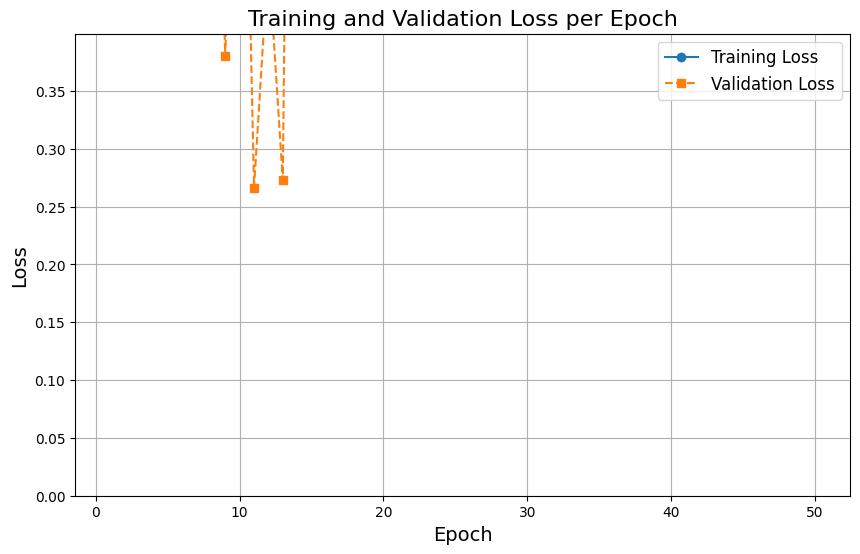

In [11]:
# Plotting training and validation loss curves with zoomed y-axis
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_epochs + 1), train_losses, marker='o', linestyle='-', label="Training Loss")
plt.plot(range(1, num_epochs + 1), val_losses, marker='s', linestyle='--', label="Validation Loss")
plt.title("Training and Validation Loss per Epoch", fontsize=16)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.grid(True)
plt.legend(fontsize=12)

# Adjust y-axis limits to zoom in
min_loss = min(min(train_losses), min(val_losses))
plt.ylim(0, min_loss * 1.5)  # Set upper limit slightly above the minimum loss for better visibility

plt.show()

In [14]:
def show_predictions(dataloader, netG, device, channels=None):
    """
    Displays the RGB input, ground truth spectral channels, and model predictions for a single sample in a vertical layout.
    Args:
        dataloader: DataLoader to fetch data.
        netG: Trained generator model to generate predictions.
        device: Device (CPU/GPU) to use.
        channels: List of channel names (e.g., ['Green', 'NIR', 'Red', 'Red Edge']).
    """
    netG.eval()  # Set generator to evaluation mode

    channels = channels or ['Green', 'NIR', 'Red', 'Red Edge']  # Default channel names
    num_spectral_channels = len(channels)

    # Get one batch of data
    rgb_images, *spectral_images = next(iter(dataloader))
    rgb_images = rgb_images.to(device)  # Move RGB inputs to the device
    spectral_images = torch.stack(spectral_images, dim=1).squeeze(2).to(device)  # Ground truth
    noise = torch.randn(rgb_images.size(0), noise_dim, device=device)
    predictions = netG(noise)  # Model predictions

    # Use only the first sample in the batch
    rgb_image = rgb_images[0].permute(1, 2, 0).cpu().numpy()  # Convert to HxWxC for RGB
    ground_truth = spectral_images[0].cpu().numpy()  # (num_channels, H, W)
    prediction = predictions[0].detach().cpu().numpy()  # Detach, then convert to NumPy (num_channels, H, W)

    # Create a vertical layout figure
    fig, axs = plt.subplots(num_spectral_channels, 3, figsize=(15, 5 * num_spectral_channels))
    for channel_idx in range(num_spectral_channels):
        spectral_channel_gt = ground_truth[channel_idx]  # Ground truth for this channel
        spectral_channel_pred = prediction[channel_idx]  # Prediction for this channel

        # RGB input
        if channel_idx == 0:  # Show RGB only in the first row
            axs[channel_idx, 0].imshow(rgb_image)
            axs[channel_idx, 0].set_title("RGB Input")
        else:
            axs[channel_idx, 0].axis("off")  # Keep empty for other rows

        # Ground truth
        axs[channel_idx, 1].imshow(spectral_channel_gt, cmap="viridis")
        axs[channel_idx, 1].set_title(f"GT: {channels[channel_idx]}")

        # Prediction
        axs[channel_idx, 2].imshow(spectral_channel_pred, cmap="viridis")
        axs[channel_idx, 2].set_title(f"Pred: {channels[channel_idx]}")

        # Remove axes for cleaner visualization
        axs[channel_idx, 0].axis("off")
        axs[channel_idx, 1].axis("off")
        axs[channel_idx, 2].axis("off")

    plt.tight_layout()
    plt.show()


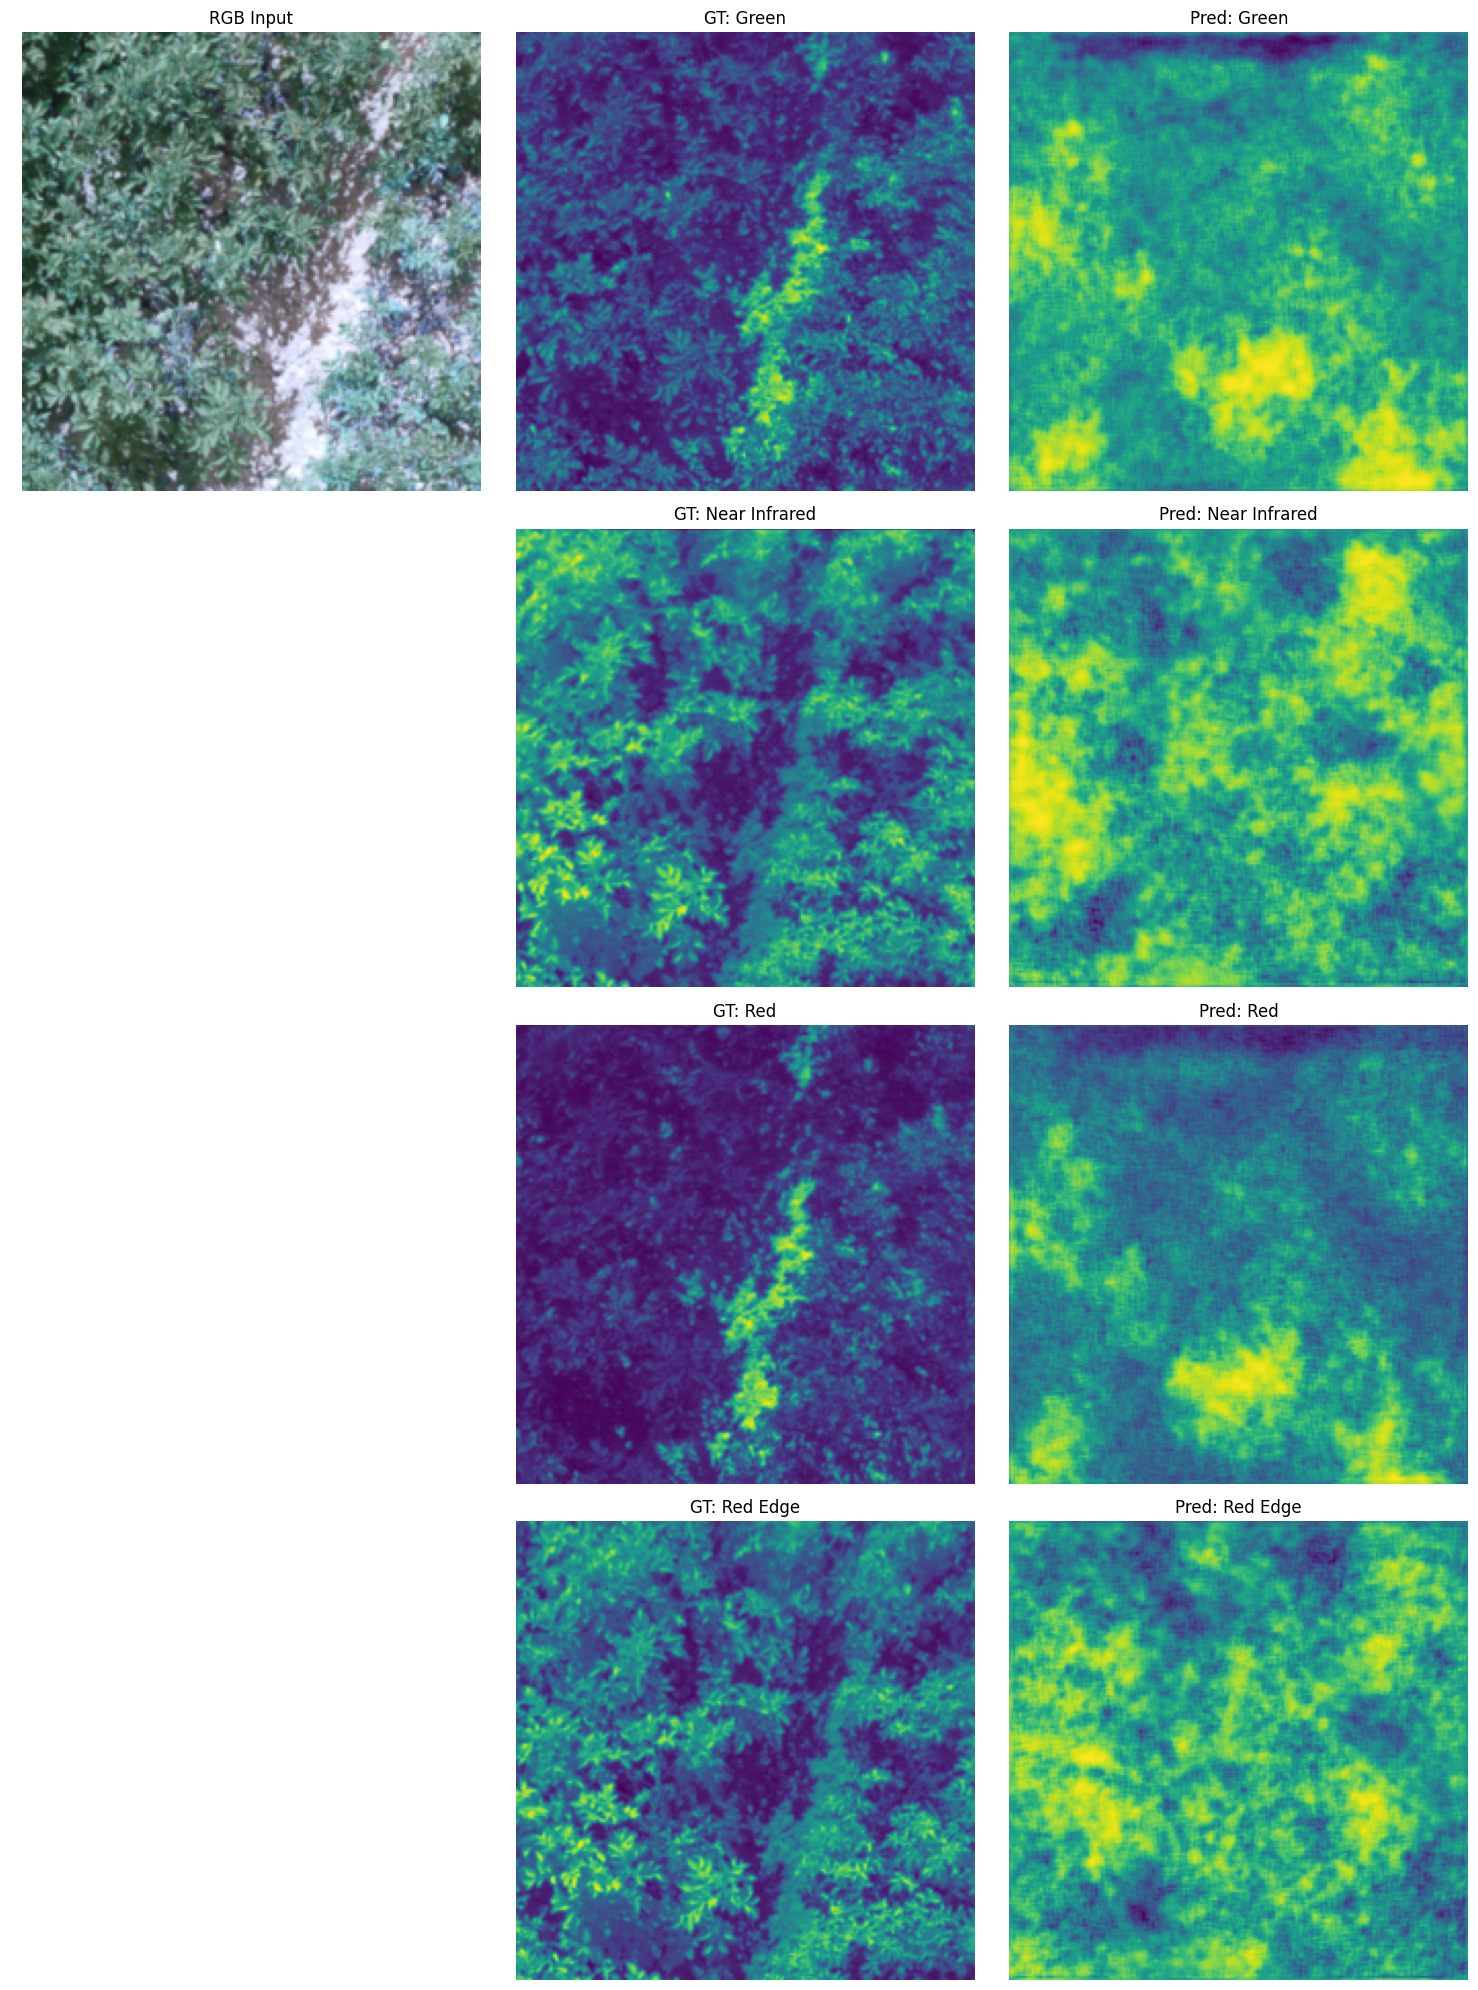

In [15]:
channels = ['Green', 'Near Infrared', 'Red', 'Red Edge']
show_predictions(test_dataloader, netG, device, channels=channels)